In [2]:
!unzip source_final.zip

Archive:  source_final.zip
   creating: source_final/
  inflating: source_final/catalogo.csv  
  inflating: source_final/cliente.csv  
  inflating: source_final/compdet.csv  
  inflating: source_final/compracab.csv  
  inflating: source_final/proveedor.csv  
  inflating: source_final/ventacab.csv  
  inflating: source_final/ventadet.csv  


In [3]:
src_catalogo = 'source_final/catalogo.csv'
src_cliente = 'source_final/cliente.csv'
src_compdet = 'source_final/compdet.csv'
src_compracab = 'source_final/compracab.csv'
src_proveedor = 'source_final/proveedor.csv'
src_ventacab = 'source_final/ventacab.csv'
src_ventacdet = 'source_final/ventadet.csv'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

In [5]:
df_src_catalogo = pd.read_csv(src_catalogo,  encoding='latin-1')
df_src_cliente = pd.read_csv(src_cliente,  encoding='latin-1')
df_src_compdet = pd.read_csv(src_compdet,  encoding='latin-1')
df_src_compracab = pd.read_csv(src_compracab,  encoding='latin-1')
df_src_proveedor = pd.read_csv(src_proveedor,  encoding='latin-1')
df_src_ventacab = pd.read_csv(src_ventacab,  encoding='latin-1', low_memory=False)
df_src_ventacdet = pd.read_csv(src_ventacdet,  encoding='latin-1', low_memory=False)

In [6]:
#Buscamos el registo que esta causando error
df_src_ventacab[df_src_ventacab['total_vnta'] > 100000 ]
df_src_ventacab.drop(147564, inplace=True)

In [7]:
#Buscamos el registo que esta causando error
df_src_ventacab[df_src_ventacab['total_vnta'] > 100000 ]

,id_vnta,id_alma,fecha_vnta,tpcam_vnta,moneda_vnta,id_cpto,id_vend,id_clie,total_vnta,neto_vnta,...,saldo_vnta,id_desc,nomb_desc,desc_vnta,ifact_vnta,id_cpte,entre_vnta,fechapago_vnta,delivery_vnta,totem


In [9]:
#convertimos a tipo fecha la columna
df_src_ventacab['date_add'] = pd.to_datetime(df_src_ventacab['date_add'])

In [10]:
#creamos una columna de solo fecha
df_src_ventacab['fecha_vnta_year'] = pd.DatetimeIndex(df_src_ventacab['date_add']).year
df_src_ventacab['fecha_vnta_hour'] = df_src_ventacab['date_add'].dt.hour
df_src_ventacab['fecha_vnta_month'] = df_src_ventacab['date_add'].dt.month
df_src_ventacab['fecha_vnta_day_of_week'] = df_src_ventacab['date_add'].dt.day_name()
df_src_ventacab['fecha_vnta_month_name'] = df_src_ventacab['date_add'].dt.month_name()
df_src_ventacab['fecha_vnta_day_of_week_number'] = df_src_ventacab['date_add'].dt.dayofweek
df_src_ventacab['fecha_vnta_month_day'] = df_src_ventacab['date_add'].dt.day

In [11]:
# damos formato al numero 
pd.set_option('float_format', '{:.2f}'.format)
#Obtenemos la fecha
df_src_ventacab.groupby(['fecha_vnta_year']).sum()['total_vnta']

fecha_vnta_year
2016    819428.00
2017   3106005.50
2018   3913868.10
2019   3213959.30
Name: total_vnta, dtype: float64

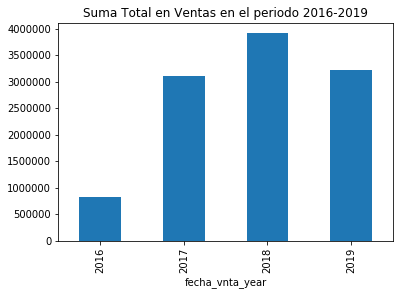

In [12]:
# Volumenes de Venta en el periodo 2016-2019
df_src_ventacab.groupby(['fecha_vnta_year']).sum()['total_vnta'].plot(kind='bar', stacked=True)
plt.title('Suma Total en Ventas en el periodo 2016-2019')

plt.show()

Text(0.5, 1.0, 'Volumen de Ventas en el periodo 2016-2019')

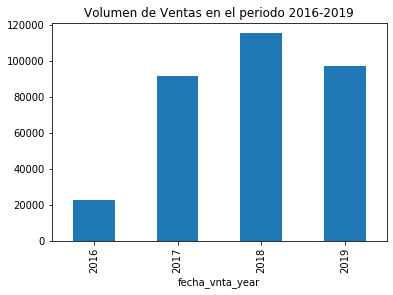

In [13]:
df_src_ventacab.groupby(['fecha_vnta_year']).count()['total_vnta'].plot(kind='bar', stacked=True)
plt.title('Volumen de Ventas en el periodo 2016-2019')

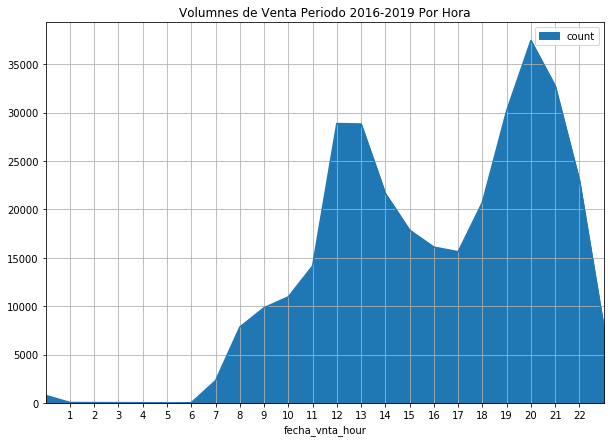

In [14]:
#CAntidad de ventas por hora
from matplotlib import cm

fig, ax = plt.subplots(figsize=(10,7))

df_src_ventacab.groupby(['fecha_vnta_hour']).count()['id_vnta']\
  .reset_index(name='count')\
  .plot(ax=ax, x='fecha_vnta_hour', y='count', kind='area', logx=False,xticks = range(1,23))

plt.title('Volumnes de Venta Periodo 2016-2019 Por Hora')
ax.grid(True)
plt.show()

In [15]:
def tendencia_venta_mes_dia_semana(anho=2016):
  cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

  fig, ax = plt.subplots(figsize=(12,10))
  df= df_src_ventacab[df_src_ventacab['fecha_vnta_year'] == anho]\
    .groupby([ 'fecha_vnta_month', 'fecha_vnta_month_name', 'fecha_vnta_day_of_week', 'fecha_vnta_day_of_week_number'])['id_vnta']\
    .count()\
    .unstack(['fecha_vnta_month_name', 'fecha_vnta_month'])\

  df = df.sort_values(by='fecha_vnta_day_of_week_number')

  df.plot(ax=ax, kind='line')

  locs, labels=plt.xticks()
  x_ticks = []
  new_xticks=cats

  ax.grid(True)

  plt.title('Tendencia de Venta para el año : {} para los dias de la semana.'.format(anho),y=1.2)
  plt.xticks(locs, new_xticks, rotation=45, horizontalalignment='right')

  plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
            ncol=2, mode="expand", borderaxespad=0.)

  plt.show()

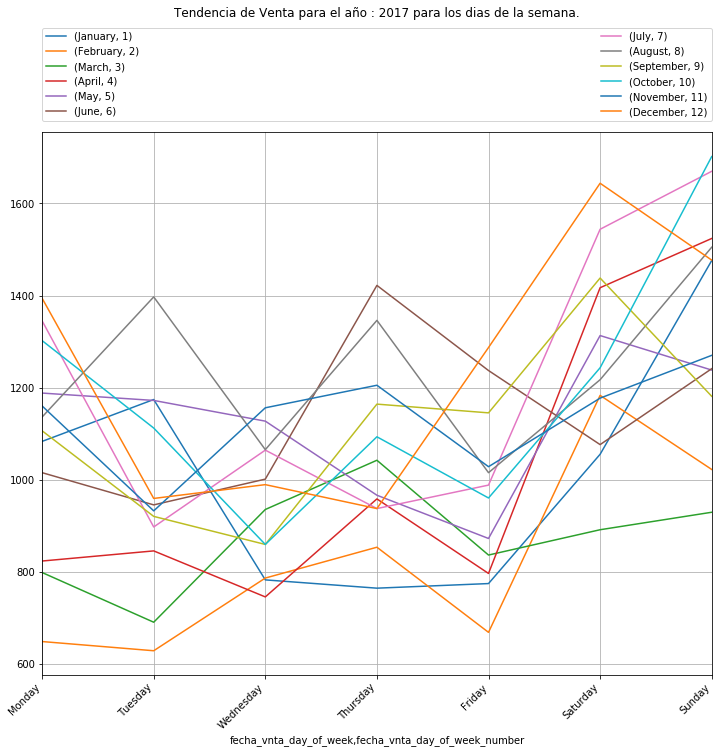

In [16]:
tendencia_venta_mes_dia_semana(2017)

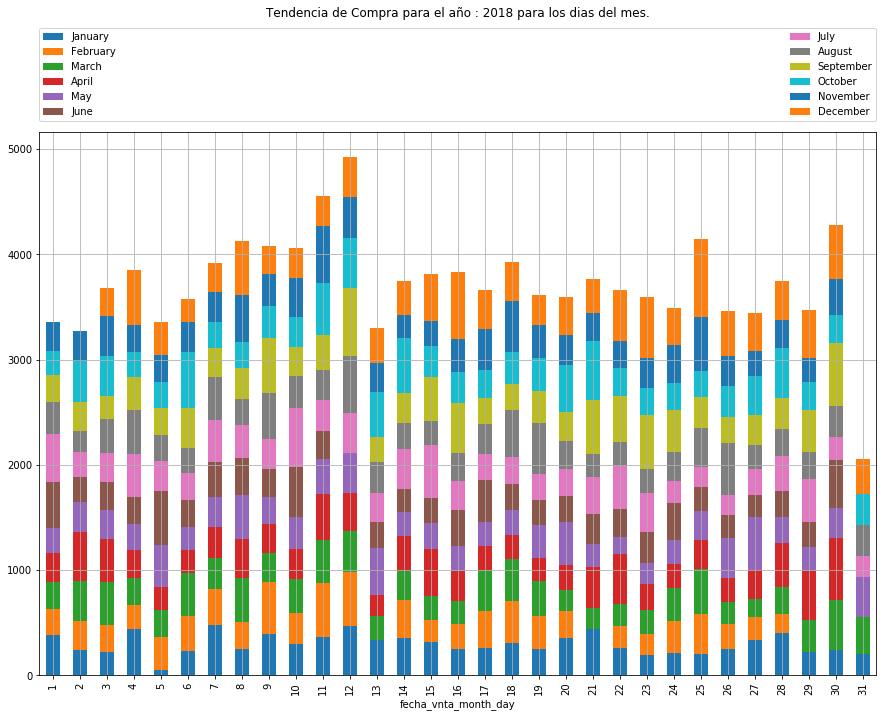

In [17]:
def tendencia_venta_dia_mes_año(anho=2016):
  cats = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September','October','November', 'December']
  fig, ax = plt.subplots(figsize=(15,10))
  df= df_src_ventacab[df_src_ventacab['fecha_vnta_year']==anho]\
    .groupby([ 'fecha_vnta_month','fecha_vnta_month_day' ])['id_vnta']\
    .count()\
    .unstack(['fecha_vnta_month'])\

  l = df.plot(ax=ax, kind='bar', stacked=True)


  ax.grid(True)

  plt.title('Tendencia de Compra para el año : {} para los dias del mes.'.format(anho),y=1.2)

  plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
            ncol=2, mode="expand", borderaxespad=0., labels=cats)

  plt.show()



tendencia_venta_dia_mes_año(2018)

In [18]:
# Creamos un join entre Detalle y Catalogo para analizar los productos
# por cada Venta
df_src_ventacdet_catalogo = df_src_ventacdet.merge( df_src_catalogo, how='left', on='id_cata')

#Eliminamos el registro que casusa problemas
df_src_ventacdet_catalogo.drop(df_src_ventacdet_catalogo.loc[df_src_ventacdet_catalogo['cant_det'] > 10000].index, inplace=True)

In [21]:
#Obtenemos los 10 productos mas vendidos de acuerdo a la cantidad por pedido
df_src_ventacdet_catalogo.groupby(['id_cata','nomb_cata'])\
    .sum()['cant_det'].reset_index(name='sum')\
    .sort_values(by=['sum'], ascending=False)\
    .head(10)

# Volumenes de Venta por producto
def volumen_venta_producto(size):
  fig, ax = plt.subplots(figsize=(15,7))

  df_src_ventacdet_catalogo.groupby(['id_cata','nomb_cata'])\
    .sum()['cant_det']\
    .reset_index(name='sum')\
    .sort_values(by=['sum'], ascending=False)\
    .head(size)\
    .plot(ax=ax, kind='barh', x='nomb_cata', y='sum')\

  ax.grid(True)
  plt.title('Volumenes de Venta - 10 Productos mas Vendidos')
  plt.show()

In [20]:
df_src_ventacdet_catalogo.groupby(['id_cata','nomb_cata'])\
    .sum()['cant_det'].reset_index(name='sum')\
    .sort_values(by=['sum'], ascending=False)\
    .head(10)

,id_cata,nomb_cata,sum
41,105,CHICKEN 1/8 - BROASTER (V),108990.00
40,102,CHICKEN 1/4 - BROASTER (V),69497.00
15,18,ICE TEA - (V) - SN,42322.00
6,9,COCA COLA POPULAR 600 ML (V),42132.00
116,227,EMPANADA DE QUESO (SNACK),39789.00
51,159,CHICKEN 1/8 - BRASA (V),39268.00
47,155,SALTEÃAS (SNACK),35764.00
4,7,MILANESA - CLASICA (V),24922.00
1,4,HAMBURGUESA COMPLETA (AL),22410.00
52,160,HELADO SIMPLE - SN,22042.00


/home/xeio/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/xeio/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0, flags=flags)


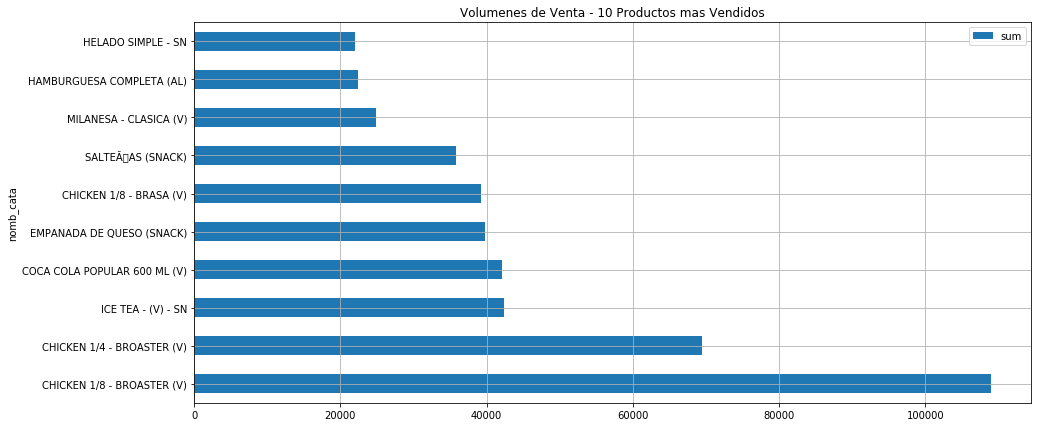

In [22]:
# Volumenes de Venta por producto los n primeros
n = 10
volumen_venta_producto(n)

In [23]:
#hacemos merge del catalogo de ventas con el de detalle de venta
#para hacer un analisis entre el detalle y el maestro
df_src_ventacab_catalogo = df_src_ventacab.merge( df_src_ventacdet_catalogo, how='left', on='id_vnta')

In [34]:
# creamos las columnas para hacer groups by
df_src_ventacab_catalogo['fecha_vnta_hour'] = pd.DatetimeIndex(df_src_ventacab_catalogo['date_add']).hour
df_src_ventacab_catalogo['fecha_vnta_year'] = pd.DatetimeIndex(df_src_ventacab_catalogo['date_add']).year
df_src_ventacab_catalogo['fecha_vnta_month'] = pd.DatetimeIndex(df_src_ventacab_catalogo['date_add']).month
df_src_ventacab_catalogo['fecha_vnta_day_name']= pd.DatetimeIndex(df_src_ventacab_catalogo['date_add']).day_name

df_src_ventacdet_catalogo['fecha_vnta_day_name']= pd.DatetimeIndex(df_src_ventacab_catalogo['date_add']).day_name

In [35]:
#TENDENCIA DE VENTAS DE PRODUCTOS EN FUNCION 


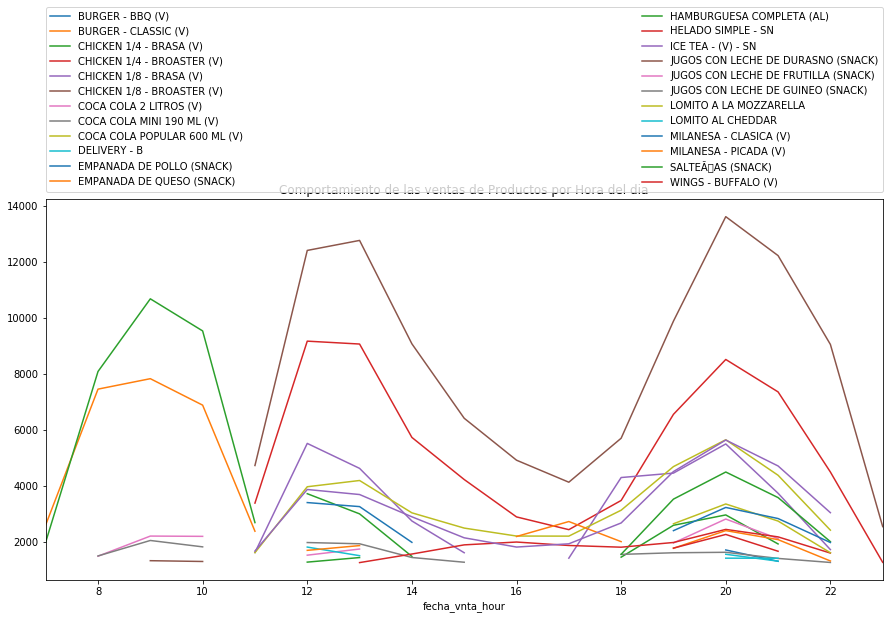

In [36]:
fig, ax = plt.subplots(figsize=(15,7))

df_producto_hora =   df_src_ventacab_catalogo.groupby(['id_cata','nomb_cata','fecha_vnta_hour'])\
    .sum()['cant_det']\
    .reset_index(name='sum')\
    .sort_values(by=['sum'], ascending=False)\
    .head(150)

pivot = df_producto_hora.pivot(index='fecha_vnta_hour', columns='nomb_cata', values='sum')

pivot.plot(ax=ax, kind='line')\

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.title('Comportamiento de las ventas de Productos por Hora del dia')
plt.show()


In [37]:
#**TENDENCIA DE VENTA DE PRODUCTOS MAS VENDIDOS EN FUNCION DE 24 HORAS**

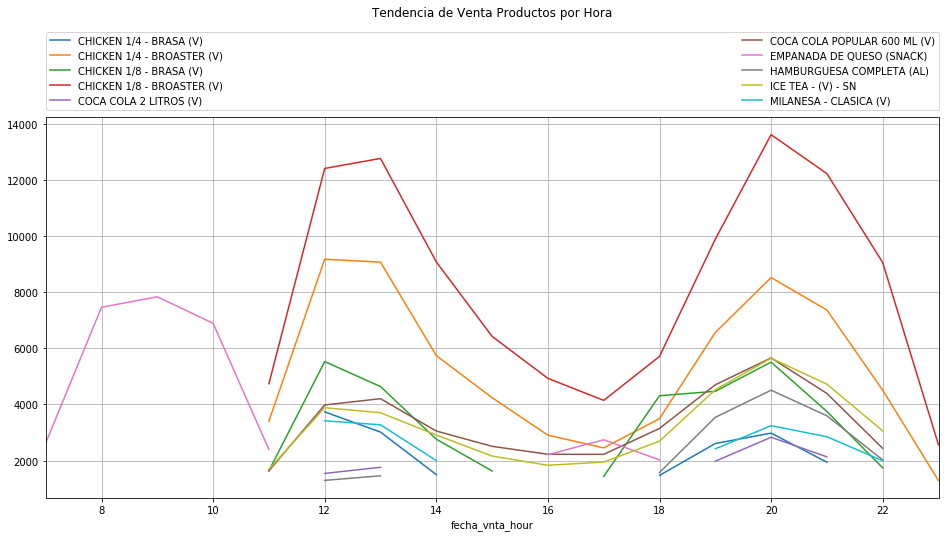

In [38]:
#OBtengo los 10 productos mas vendidos
df_ten_more_sold = df_src_ventacdet_catalogo.groupby(['id_cata','nomb_cata'])\
  .count()['id_vnta']\
  .reset_index(name='count')\
  .sort_values(by=['count'], ascending=False)\
  .head(10)\
  
#grafico la tendencia de consumo por hora de los 10 productos mas consumidos

fig, ax = plt.subplots(figsize=(16,7))

df_ten_more_sold_merge = df_producto_hora.merge(df_ten_more_sold, how='right' , on='id_cata')

pivot = df_ten_more_sold_merge.pivot(index='fecha_vnta_hour', columns='nomb_cata_x', values='sum')

pivot.plot(ax=ax, kind='line')

ax.grid(True)

'''
best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
'''

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower center',
           ncol=2, mode="expand", borderaxespad=0.)
plt.title('Tendencia de Venta Productos por Hora', y=1.25)


plt.show()

In [39]:
#df_src_ventacdet_catalogo
df_venta_catalogo_venta_det = df_src_ventacdet_catalogo.merge(df_src_ventacab,how='inner',on='id_vnta')

In [40]:
df_producto_day_name =   df_venta_catalogo_venta_det.groupby(['id_cata','nomb_cata','fecha_vnta_day_of_week'])\
    .sum()['cant_det']\
    .reset_index(name='sum')\
    .sort_values(by=['sum'], ascending=False)\
    .head(150)

df_producto_day_name

,id_cata,nomb_cata,fecha_vnta_day_of_week,sum
290,105,CHICKEN 1/8 - BROASTER (V),Sunday,21364.00
289,105,CHICKEN 1/8 - BROASTER (V),Saturday,19123.00
288,105,CHICKEN 1/8 - BROASTER (V),Monday,15185.00
283,102,CHICKEN 1/4 - BROASTER (V),Sunday,14455.00
287,105,CHICKEN 1/8 - BROASTER (V),Friday,13877.00
...,...,...,...,...
5,3,BURGER - BBQ (V),Tuesday,1119.00
122,20,PORCION DE PAPA (V),Sunday,1108.00
795,228,COMBO COLEGA,Wednesday,1107.00
65,12,FANTA NARANJA POPULAR 600 ML,Saturday,1100.00


In [42]:
df_chicken =  df_src_ventacab_catalogo[df_src_ventacab_catalogo['id_cata']==102]
df_chicken_year = df_chicken [ df_chicken['fecha_vnta_year']==2016] 
df_chicken_month = df_chicken [ df_chicken['fecha_vnta_month']==9]
#df_chicken_month.groupby('fecha_vnta_day_name').count()['id_vnta']

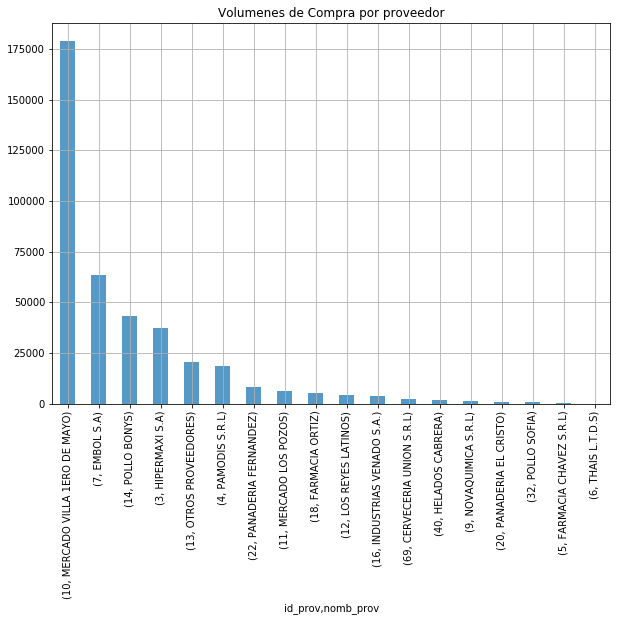

In [43]:
#del proveedor solo sacamos id_prov y nomb_prov
df_src_proveedor_nomb= df_src_proveedor[['id_prov','nomb_prov']]

#creamos un df de compras y el nombre proveedor
df_src_compracab_prov = df_src_compracab.merge(df_src_proveedor_nomb, how='inner', on='id_prov')  


#df_src_compracab_prov.groupby(['id_prov','nomb_prov'])['id_com']\
#  .count()\
#  .reset_index(name='count')\
#  .sort_values(by='count', ascending=False)

#creamos un df auxiliar con las columnas que nos interesa para sacar lo calculos
df_src_compdet_aux = df_src_compdet[['id_com','cantidad_det', 'precio_det', 'total_det','glosa_det']]

#realizamos un merge con el df detalle
df_src_compracab_compdet = df_src_compdet_aux.merge(df_src_compracab,how='inner', on='id_com')

#sacamos solo las columnas que nos interesa
df_src_compracab_compdet_aux = df_src_compracab_compdet[['id_com','id_prov','cantidad_det','precio_det','total_det','glosa_det','fecha_com',]]

#el df realizamos un merge con el nombre del proveedor
df_src_compracab_compdet_aux = df_src_compracab_compdet_aux.merge(df_src_proveedor_nomb, how='inner', on='id_prov')

fig, ax = plt.subplots(figsize=(10,7))

df_src_compracab_compdet_aux.groupby(['id_prov','nomb_prov'])\
  .sum()['total_det']\
  .sort_values(ascending=False)\
  .plot(ax=ax, x='nomb_prov', y='sum', kind='bar', logx=False ,alpha=0.75, rot=90)

plt.title('Volumenes de Compra por proveedor')
ax.grid(True)
plt.show()


In [44]:
df_src_compdet_aux = df_src_compdet[['id_com','cantidad_det', 'precio_det', 'total_det','glosa_det']]
df_src_compdet_aux

,id_com,cantidad_det,precio_det,total_det,glosa_det
0,1,3.00,13.00,39.00,PRODUCTOS DE LIMPIEZA
1,2,1.00,1000.00,1000.00,COMPRA DE SOF. A CREDITO
2,3,15.00,35.00,525.00,15 KG CARNE MILANEZA BOLLO
3,3,15.00,40.00,600.00,15 KG CARNE PARA LOMITO
4,3,10.00,25.00,250.00,10 KG CARNE MOLIDA
...,...,...,...,...,...
2443,916,30.00,1.50,45.00,POR LA COMPRA DE 30 FLAUTA ESP. 120
2444,917,1.00,100.00,100.00,"POR REPARACIÃN DEL AIRE ACONDICIONADO, CAMBIO..."
2445,919,20.00,1.00,20.00,POR LA COMPRA DE PAN
2446,920,1.00,487.00,487.00,PAGO POR SERVICIO DE INTERNET CORRESPONDIENTE ...


In [45]:
# creamos las nuevas columnas para el procesamiento
df_src_compracab_compdet_aux['fecha_com'] = pd.to_datetime(df_src_compracab_compdet_aux['fecha_com'])

df_src_compracab_compdet_aux['fecha_com_year']=df_src_compracab_compdet_aux['fecha_com'].dt.year
df_src_compracab_compdet_aux['fecha_com_month']=df_src_compracab_compdet_aux['fecha_com'].dt.month
df_src_compracab_compdet_aux['fecha_com_day']=df_src_compracab_compdet_aux['fecha_com'].dt.day
df_src_compracab_compdet_aux['fecha_com_month_name']=df_src_compracab_compdet_aux['fecha_com'].dt.month_name()
df_src_compracab_compdet_aux['fecha_com_day_of_week']=df_src_compracab_compdet_aux['fecha_com'].dt.dayofweek
df_src_compracab_compdet_aux['fecha_com_day_of_week_name']=df_src_compracab_compdet_aux['fecha_com'].dt.day_name()

In [46]:
#TENDENCIA DE COMPRAS POR DIA MES DEL AÑO

In [47]:
def tendencia_compra_dia_mes_anho(anho=2016):
  anho = 2016
  fig, ax = plt.subplots(figsize=(15,7))

  df_src_compracab_compdet_aux[df_src_compracab_compdet_aux['fecha_com_year']==anho]\
    .groupby(['fecha_com_month','fecha_com_month_name','fecha_com_day'])\
    .sum()['total_det']\
    .unstack(['fecha_com_month','fecha_com_month_name'])\
    .plot(ax=ax, kind='bar', logx=False ,alpha=0.75, rot=90, stacked=True)

  plt.title('Volumenes de Compra por Mes/dia para el año {}'.format(anho))
  ax.grid(True)
  plt.show()

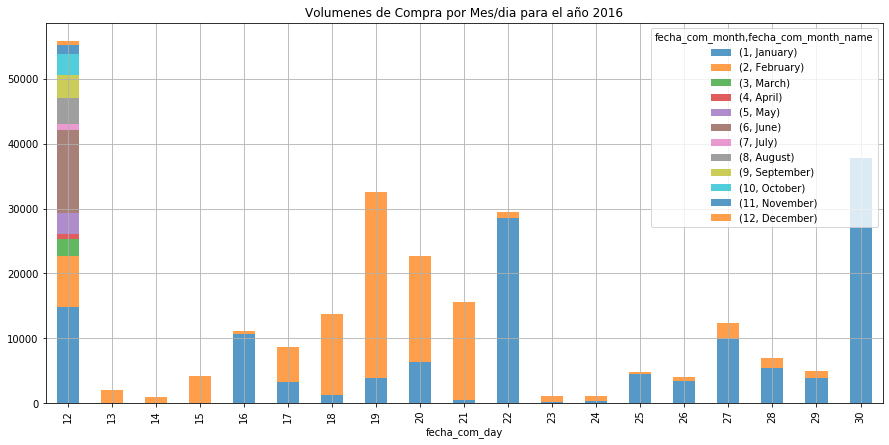

In [49]:
tendencia_compra_dia_mes_anho(2016)

In [50]:
df = df_src_compracab_compdet_aux.groupby(['glosa_det','fecha_com_day_of_week','fecha_com_day_of_week_name'])\
  .sum()[['total_det']]
  
df[df['total_det'] > 1000]

,,,total_det
glosa_det,fecha_com_day_of_week,fecha_com_day_of_week_name,
50 POLLO BRASA DE 1.700 ECO,4,Friday,1115.40
ADMINISTRACION,6,Sunday,2000.00
ALFREDO VALENCIA,6,Sunday,2025.00
ALQUILER (C/5 AV. PRINCIPAL VILLA PRIMERO DE MAYO) DIC.,1,Tuesday,12528.00
ALQUILER CORRESPONDIENTE AL MES DE DIC. AL 15 DE ENERO 2017,4,Friday,1400.00
...,...,...,...
TURNO EXTRA Y HORAS EXTRAS,2,Wednesday,3126.00
TURRIL DE 200 LITROS,4,Friday,3160.00
TURRILES DE 200 LTS ACEITE,1,Tuesday,3160.00


/home/xeio/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/xeio/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


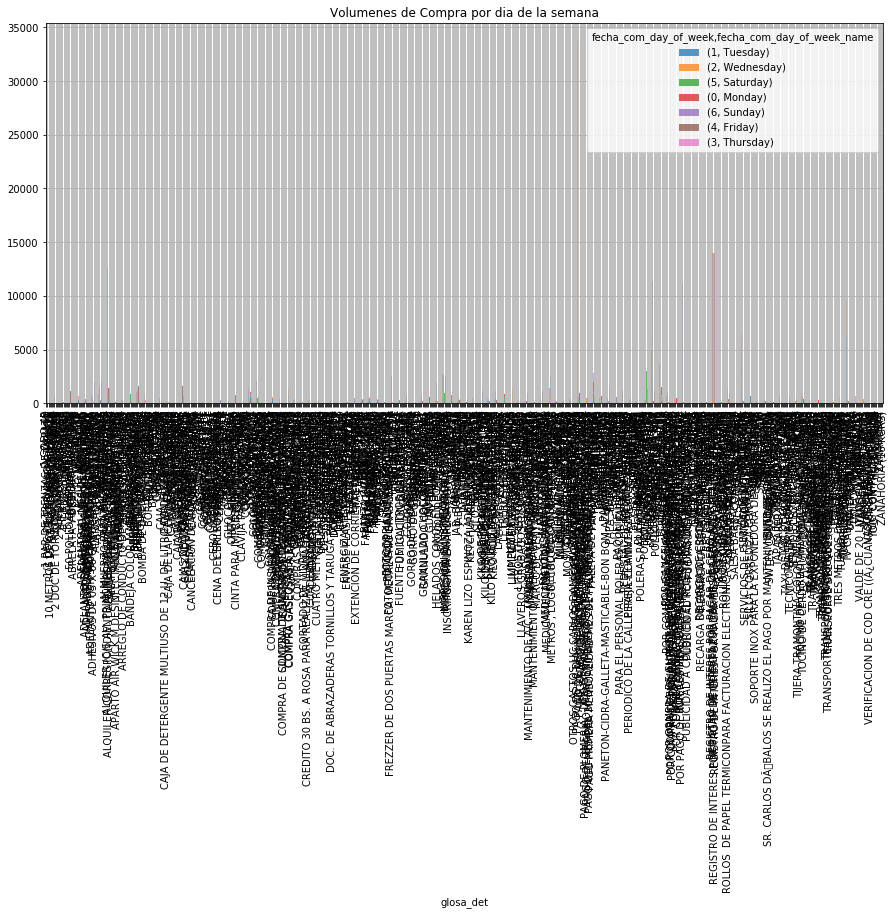

In [51]:
anho = 2017
fig, ax = plt.subplots(figsize=(15,7))

df_src_compracab_compdet_aux.groupby(['glosa_det','fecha_com_day_of_week','fecha_com_day_of_week_name'])\
  .sum()['total_det'].unstack(['fecha_com_day_of_week','fecha_com_day_of_week_name'])\
  .plot(ax=ax, kind='bar', logx=False ,alpha=0.75, rot=90, stacked=True)


plt.title('Volumenes de Compra por dia de la semana'.format(anho))
ax.grid(True)
plt.show()

In [52]:
#Limpiar los campos
for i in df_src_compracab_compdet_aux[df_src_compracab_compdet_aux['glosa_det'].str.contains('TURRIL')].index:
  df_src_compracab_compdet_aux.at[i,'glosa_det'] = 'TURRIL DE ACEITE 200 LTS'

for i in df_src_compracab_compdet_aux[df_src_compracab_compdet_aux['glosa_det'].str.contains('TURRIL')].index:
  df_src_compracab_compdet_aux.at[i,'glosa_det'] = 'TURRIL DE ACEITE 200 LTS'

In [53]:
# hay q limpiar PAN de LOMITO

df_lomito = df_src_compracab_compdet_aux[df_src_compracab_compdet_aux['glosa_det'].str.contains('LOMITO')]

for i in df_lomito:
  print(i.index)
#    if i.find('PAN') > -1:
#      df_src_compracab_compdet_aux.at[i,'glosa_det'] = 'PAN DE LOMITO'

<built-in method index of str object at 0x7f9eeb7963b0>
<built-in method index of str object at 0x7f9ecc07d4f0>
<built-in method index of str object at 0x7f9eeb7eecb0>
<built-in method index of str object at 0x7f9ee99a4130>
<built-in method index of str object at 0x7f9ee99a4030>
<built-in method index of str object at 0x7f9eeb7d8b70>
<built-in method index of str object at 0x7f9ecc07d630>
<built-in method index of str object at 0x7f9ecce1da70>
<built-in method index of str object at 0x7f9ec31953b0>
<built-in method index of str object at 0x7f9ec31954b0>
<built-in method index of str object at 0x7f9ec3195f70>
<built-in method index of str object at 0x7f9ec3125760>
<built-in method index of str object at 0x7f9ec312bf30>
<built-in method index of str object at 0x7f9ec31115d0>


In [54]:
for i in df_src_compracab_compdet_aux[df_src_compracab_compdet_aux['glosa_det'].str.contains('PAN HAMBURGUESA')].index:
  print(df_src_compracab_compdet_aux.at[i,'glosa_det'])
  df_src_compracab_compdet_aux.at[i,'glosa_det'] = 'PANES DE HAMBURGUESA'

PAN HAMBURGUESA
PAN HAMBURGUESA


In [55]:
df_src_compracab_compdet_aux[df_src_compracab_compdet_aux['glosa_det'].str.contains('HAMBURGUESA')].glosa_det.unique()

array(['HAMBURGUESAS', 'PAN DE HAMBURGUESA', 'PANES DE HAMBURGUESA',
       'HAMBURGUESA', 'ANILLOS PARA HAMBURGUESAS'], dtype=object)

In [56]:
df_src_compracab_compdet_aux.at[545,'glosa_det']='HUEVOS'

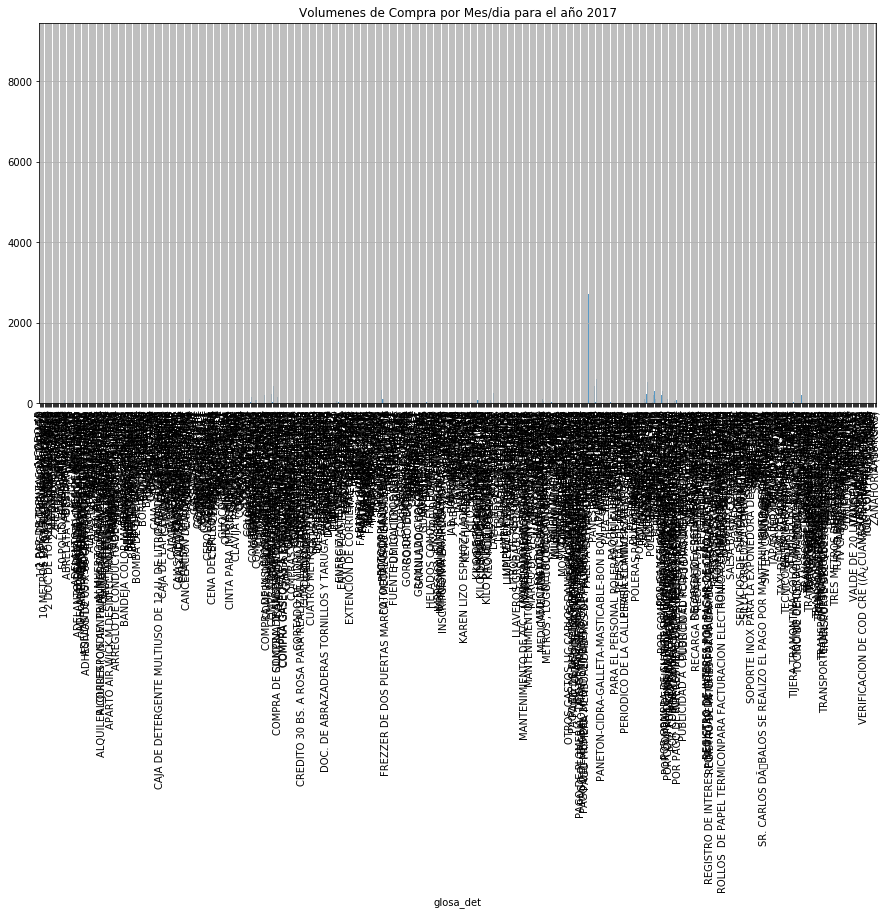

In [57]:
anho = 2017
fig, ax = plt.subplots(figsize=(15,7))

df_src_compracab_compdet_aux.groupby(['glosa_det'])\
  .sum()['cantidad_det']\
  .plot(ax=ax, kind='bar', logx=False ,alpha=0.75, rot=90, stacked=True)
  #.unstack(['fecha_com_month','fecha_com_month_name'])\
  

plt.title('Volumenes de Compra por Mes/dia para el año {}'.format(anho))
ax.grid(True)

plt.show()

In [58]:
df_src_compracab_compdet_aux.groupby(['glosa_det'])\
  .sum()['cantidad_det']\
  .reset_index(name='sum')\
  .sort_values(by='sum',ascending=False).head(30)\

,glosa_det,sum
344,HUEVOS,9000.00
474,PAN DE HAMBURGUESA,2718.00
494,PAPEL SULFITO,2000.00
602,SALTEÃAS,1850.00
475,PAN DE LOMITO,610.00
481,PANES DE LOMITO,601.00
525,POLLO BRASA DE 1.7 ECO,530.00
470,PAGO DEL 07/11/16 AL 14/11/16,469.60
479,PANES DE HAMBURGUESA,432.00
202,COMPRA DE PANES PARA LOMITO,430.00


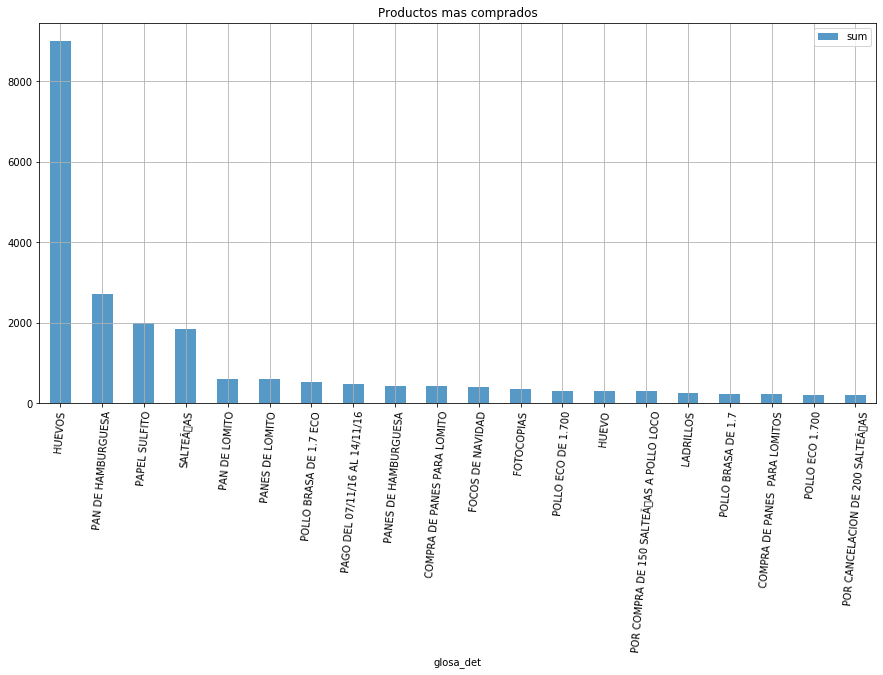

In [59]:
fig, ax = plt.subplots(figsize=(15,7))

df_src_compracab_compdet_aux.groupby(['glosa_det'])\
  .sum()['cantidad_det']\
  .reset_index(name='sum')\
  .sort_values(by='sum',ascending=False).head(20)\
  .plot(ax=ax, kind='bar', x='glosa_det',y='sum', logx=False ,alpha=0.75, rot=85, stacked=True)

plt.title('Productos mas comprados')
ax.grid(True)

plt.show()
